In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

#**Ejercicio 1**

In [ ]:
archivo_datos = files.upload()
datos = pd.read_csv(list(archivo_datos.keys())[0], sep = " "); datos

Saving datos.txt to datos.txt


,t[s],x(t)[m],y(t)[m]
0,0.0,3.590000e+07,0.000000e+00
1,3600.0,3.391460e+07,1.177327e+07
2,7200.0,2.817800e+07,2.224433e+07
3,10800.0,1.932471e+07,3.025501e+07
4,14400.0,8.333972e+06,3.491926e+07
5,18000.0,-3.578567e+06,3.572120e+07
6,21600.0,-1.509529e+07,3.257211e+07
7,25200.0,-2.494237e+07,2.582031e+07
8,28800.0,-3.203064e+07,1.621260e+07
9,32400.0,-3.557609e+07,4.811658e+06


In [ ]:
t = datos["t[s]"].to_numpy()
x = datos["x(t)[m]"].to_numpy()
y = datos["y(t)[m]"].to_numpy()

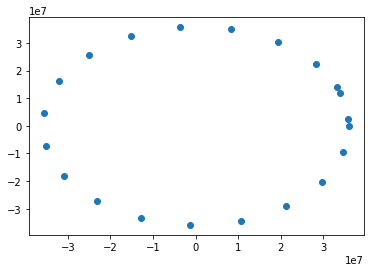

In [ ]:
plt.scatter(x,y)

In [ ]:
def interpolacion_lineal(x, xn, yn): #Algoritmo sobre una lista de puntos
  y = np.zeros(len(x))
  for j in range(len(x)):
    for i in range(len(xn) - 1):
      if xn[i] <= x[j] <= xn[i+1]:
        m = (yn[i+1] - yn[i])/(xn[i+1] - xn[i])
        y[j] = (m * (x[j] - xn[i])) + yn[i]
        break
  return y

In [ ]:
t_interpolacion = np.linspace(0,72000,121); t_interpolacion #Rangos de tiempo de 15 min
x_interpolacion = interpolacion_lineal(t_interpolacion, t, x)
y_interpolacion = interpolacion_lineal(t_interpolacion, t, y)

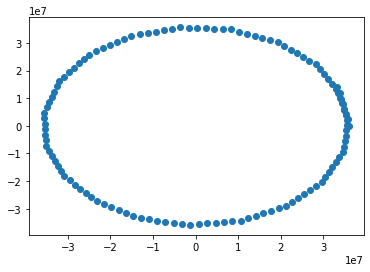

In [ ]:
plt.scatter(x_interpolacion, y_interpolacion) #Orbita Interpolada

Se aplicará método de Bisección para el conjunto de datos en $x$, de modo que se pueda deducir el periodo orbital mediante el siguiente analisis.

Puesto que el conjunto de datos de $x$ tiene comportamiento cosenoidal, el periodo $T$ puede deducirse como $4t$, donde $t$ es aquel valor tal que $x(t)=0$.

La función para el $x$ se muestra a continuación:

$$x(t)=A\cos{\bigg(\frac{{2\pi}}{T}t\bigg)}$$

$A$ corresponde a la amplitud de la función, es decir, el valor maximo que toma $x$

$$0=A\cos{\bigg(\frac{{2\pi}}{T}t\bigg)}$$
$$T=\frac{{2\pi}}{\cos^{-1}{(0)}}t$$
$$T=4t$$

Similarmente se puede construir una función teorica para $y$

$$y=A\sin{\bigg(\frac{{2π}}{T}t\bigg)}$$

In [ ]:
def interpolacion_lineal_un_punto(x, xn, yn): #Algoritmo sobre un solo punto
  for i in range(len(xn) - 1):
    if xn[i] <= x <= xn[i+1]:
      m = (yn[i+1] - yn[i])/(xn[i+1] - xn[i])
      y = (m * (x - xn[i])) + yn[i]
      break
  return y

In [ ]:
def biseccion(f,a,b,tol,t,x): #Funcionará con f como la función que retorna el valor interpolado de un conjunto de datos
  if f(a,t,x)*f(b,t,x) < 0:
    p = (a+b)/2
    i = 0
    while np.abs(f(p,t,x)) > tol:
      p = (a+b)/2
      if f(a,t,x)*f(p,t,x) < 0:
        b = p
      elif f(b,t,x)*f(p,t,x) < 0:
        a = p
      i += 1
    return p
  else:
    return "Error"

In [ ]:
t_raiz = biseccion(interpolacion_lineal_un_punto, 10000, 20000, 1e-5, t_interpolacion, x_interpolacion)
T = 4*t_raiz
T_horas = T/3600
print(f"El periodo orbital en horas del satelite es: {T_horas}")

El periodo orbital en horas del satelite es: 18.79838641956566


In [ ]:
def funcion_x(t,x,T): #Funciones Teoricas para X y Y
  A = np.max(x)
  return A*np.cos((2*np.pi/T)*t)

def funcion_y(t,y,T):
  A = np.max(y)
  return A*np.sin((2*np.pi/T)*t)

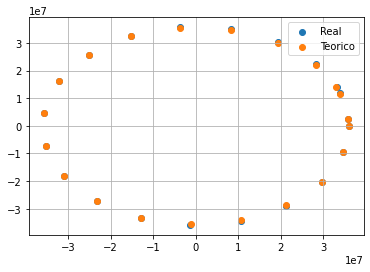

In [ ]:
x_teorico = funcion_x(t,x,T)
y_teorico = funcion_y(t,y,T)
plt.scatter(x,y, label = "Real")
plt.scatter(x_teorico, y_teorico, label = "Teorico")
plt.grid()
plt.legend()

In [ ]:
x_0 = x_interpolacion[0]
y_0 = y_interpolacion[0]
x_T = interpolacion_lineal_un_punto(T,t_interpolacion,x_interpolacion)
y_T = interpolacion_lineal_un_punto(T,t_interpolacion,y_interpolacion)
r_0 = np.sqrt((x_0**2) + (y_0**2))
r_T = np.sqrt((x_T**2) + (y_T**2))
error = np.abs(r_T - r_0)
print(f"El Error de interpolacion para la Posicion es: {error}")

El Error de interpolacion para la Posicion es: 321016.1507349387


Al notar que el error era del orden de $10^6$, se podría pensar que un mayor número de datos podría permitir una mejor aproximación al valor real y de esta forma, disminuir el error. Sin embargo, el numero de datos con el que se cuenta para la interpolación, asciende a los 120 por lo que se considera ya un buen número para realizar una buena interpolación.

Se descarta la posibilidad de emplear otro metodo de interpolación pues el alto número de datos, aumenta la probabilidad de que la función de ajuste se descontrole en el caso de Lagrange y Diferencias Divididas pues tendríamos un polinomio de alto grado.

Como alternativa, se propone realizar una regresión trigonometrica a cada uno de los valores $(x,y)$ y emplear dicha función de ajuste para estimar los nuevos valores. El error obtenido por este metodo se muestra a continuación, utilizando como función de ajuste, las deducidas anteriormente.

In [ ]:
x_T = funcion_x(T,x,T)
y_T = funcion_y(T,y,T)
r_0 = np.sqrt((x_0**2) + (y_0**2))
r_T = np.sqrt((x_T**2) + (y_T**2))
error = np.abs(r_T - r_0)
print(f"El Error de interpolacion para la Posicion es: {error}")

El Error de interpolacion para la Posicion es: 35899993.71681469


In [ ]:
x_T = funcion_x(T,x,T)
y_T = funcion_y(T,y,T)
r_0 = np.sqrt((x_0**2) + (y_0**2))
r_T = np.sqrt((x_T**2) + (y_T**2))
error = np.abs(r_T - r_0)
print(f"El Error de interpolacion para la Posicion es: {error}")

El Error de interpolacion para la Posicion es: 0.0


#**Ejercicio 2**

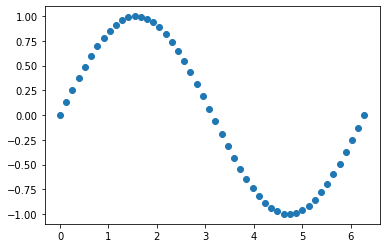

In [ ]:
x = np.linspace(0,2*np.pi,50)
y = np.sin(x)
plt.scatter(x,y)

In [ ]:
def interpolacion_lagrange(x, xn, yn):
  n = len(xn) - 1

  def L(x, n, i):
    productoria = 1
    for k in range(n):
      if k != i:
        productoria *= (x - xn[k])/(xn[i] - xn[k])
    return productoria
  
  sumatoria = 0
  for i in range(n):
    sumatoria += yn[i] * L(x,n,i)
  return sumatoria

In [ ]:
def interpolacion_diferencias(x,xn,yn):
  N = len(xn)
  D = np.zeros((N,N))
  D[0,:] = yn

  for k in range(1,N):
    for i in range(N-k):

      D[k,i] = (D[k-1,i+1] - D[k-1,i])/(xn[i+k] - xn[i])
  sumatoria = D[0,0]

  for k in range(1,N):
    productoria = 1
    for p in range(k):
      productoria *= (x - xn[p]) 
    sumatoria += D[k,0] * productoria
  return sumatoria

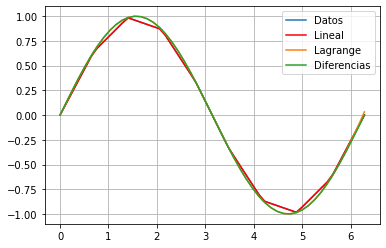

In [ ]:
xn  = np.linspace(0,2*np.pi,10)
yn = np.sin(xn)
x_interpolado = np.linspace(0, 2*np.pi, 50)
y_lineal = interpolacion_lineal(x_interpolado, xn, yn)
y_lagrange = interpolacion_lagrange(x_interpolado, xn, yn)
y_diferencias = interpolacion_diferencias(x_interpolado, xn, yn)
plt.plot(xn, yn, label = "Datos")
plt.plot(x_interpolado, y_lineal, label = "Lineal", color = "r")
plt.plot(x_interpolado, y_lagrange, label = "Lagrange")
plt.plot(x_interpolado, y_diferencias, label = "Diferencias")
plt.legend()
plt.grid()

Se aprecia como la Interpolación Lineal discrepa de los valores reales en ciertas posiciones por tanto se presupone que su error promedio debe ser mayor al de los demás métodos.

Es claro cómo los métodos de Lagrange y Diferencias Divididas tienen un mejor ajuste a la función y el cómo coinciden en la totalidad de puntos. Esto refuerza la afirmación de equivalencia entre ambos métodos y por tanto sus errores promedio serán similares.

In [ ]:
def error_promedio(n):
  xn  = np.linspace(0,2*np.pi,n)
  yn = np.sin(xn)
  x_interpolado = np.linspace(0, 2*np.pi, 100)
  y_real = np.sin(x_interpolado)
  y_lineal = interpolacion_lineal(x_interpolado, xn, yn)
  y_lagrange = interpolacion_lagrange(x_interpolado, xn, yn)
  y_diferencias = interpolacion_diferencias(x_interpolado, xn, yn)
  error_lineal = np.sum(np.abs(y_lineal - y_real))/len(y_real)
  error_lagrange = np.sum(np.abs(y_lagrange - y_real))/len(y_real)
  error_diferencias = np.sum(np.abs(y_diferencias - y_real))/len(y_real)
  return error_lineal, error_lagrange, error_diferencias

In [ ]:
lista_n = np.arange(1, 51)
lista_error_lineal = np.zeros(50)
lista_error_lagrange = np.zeros(50)
lista_error_diferencias = np.zeros(50)
for i in range(1,51):
  lista_error_lineal[i-1], lista_error_lagrange[i-1], lista_error_diferencias[i-1]  = error_promedio(i)

[]

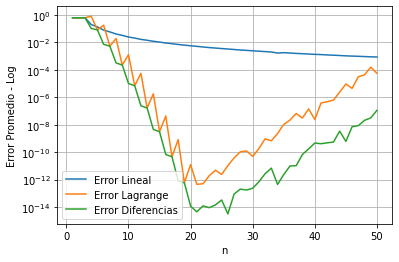

In [ ]:
plt.plot(lista_n, lista_error_lineal, label = "Error Lineal")
plt.plot(lista_n, lista_error_lagrange, label = "Error Lagrange")
plt.plot(lista_n, lista_error_diferencias, label = "Error Diferencias")
plt.legend()
plt.grid()
plt.xlabel("n")
plt.ylabel("Error Promedio - Log")
plt.semilogy() #Escala Logaritmica en eje Y

Desde esta grafica podemos observar que la Interpolación Lineal presenta mayor error que los demás métodos y pareciese comportarse bajo cierta asintota por lo que llegará a un limite de precisión.

En cuanto a los métodos de Lagrange y Diferencias Divididas, al igual que su interpolación, también presentan errores que pueden comenzar a fallar pues a mayor número de datos, se generan polinomio de grados cada vez más grandes. También se observa que en ciertos puntos, el error promedio de Lagrange y Diferencias coincide y por tanto sus interpolaciones también coinciden; sin embargo, luego de aproximadamente 20 datos, la interpolación comienza a fallar y el error aumenta

In [ ]:
#Tarea 2 70/100

#1. Lectura datos 20/50
#a) Interpolación lineal  5/15 #¿Para qué construir el nuevo dataset? justamente es lo que queremos evitar al usar interpolación
#b) Periodo 		  5/15 #Falso que tengan esa forma funcional! no puedes suponer este tipo de cosas! 
                       #aunque el valor sea acercado no sabes que perturbaciones hay sobre los datos que puedan 
                       #afectar al periodo.
#c) Error Tras un periodo 10/10 #Suponiendo el anterior bien el error está bien calculado.
#d) Discusión 		  5/10  #Es una discusión muy pobre físicamente hablando. 
                          #Si piensas en la escala del sistema ¿Realmente es un error grande?

#2. Errores promedio de interpolación 50/50
#Lineal			       10/10
#Lagrange		       10/10
#Diferencias divididas	       10/10 #por qué da tan distinto a Lagrange si son en escencia el mismo polinomio.
#Grafica en escala logarítmica 20/20